# CNN on CIFAR10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
import cv2

In [2]:
#load dataset
(X_train, y_train), (X_test, y_test) =  keras.datasets.cifar10.load_data()

In [3]:
# dataset Shape
print('Shape X_train:', X_train.shape, "y_train:", y_train.shape)
print('Shape X_test:', X_test.shape, "y_test:", y_test.shape)

Shape X_train: (50000, 32, 32, 3) y_train: (50000, 1)
Shape X_test: (10000, 32, 32, 3) y_test: (10000, 1)


In [4]:
#normalizing 
X_train = X_train.astype('float')/X_train.max()
X_test = X_test.astype('float')/X_test.max()

In [5]:
from keras import layers, models
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(.2))
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(10))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
model.compile(optimizer= 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits= True), 
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs = 8, validation_data=(X_test, y_test))


model.save('cifar10.h5')

Epoch 1/8
1563/1563 [==============================] - 180s 112ms/step - loss: 1.5981 - accuracy: 0.4125 - val_loss: 1.2666 - val_accuracy: 0.5349
Epoch 2/8
1563/1563 [==============================] - 201s 129ms/step - loss: 1.2414 - accuracy: 0.5597 - val_loss: 1.1296 - val_accuracy: 0.6043
Epoch 3/8
1563/1563 [==============================] - 173s 110ms/step - loss: 1.1038 - accuracy: 0.6100 - val_loss: 1.0374 - val_accuracy: 0.6322
Epoch 4/8
1563/1563 [==============================] - 183s 117ms/step - loss: 1.0205 - accuracy: 0.6439 - val_loss: 0.9529 - val_accuracy: 0.6620
Epoch 5/8
1563/1563 [==============================] - 175s 112ms/step - loss: 0.9538 - accuracy: 0.6666 - val_loss: 0.9012 - val_accuracy: 0.6865
Epoch 6/8
1563/1563 [==============================] - 212s 136ms/step - loss: 0.8969 - accuracy: 0.6881 - val_loss: 0.9014 - val_accuracy: 0.6865
Epoch 7/8
1563/1563 [==============================] - 159s 102ms/step - loss: 0.8486 - accuracy: 0.7021 - val_loss: 0

In [10]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck' ]

In [11]:
def  predict(img_path, img_size,  channel):
    import cv2
    from keras.models import load_model
    
    model = load_model('cifar10.h5')
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, (img_size, img_size))/255
    print(resized_img.shape)
    pred = model.predict(resized_img.reshape(1, img_size, img_size, channel ), batch_size=1)
    print(pred.argmax())
    
    plt.imshow(cv2.imread(img_path), cmap = 'gray')
    plt.xlabel(class_names[np.argmax(pred)])
    plt.show()

(32, 32, 3)
1/1 [==============================] - 0s 254ms/step
3


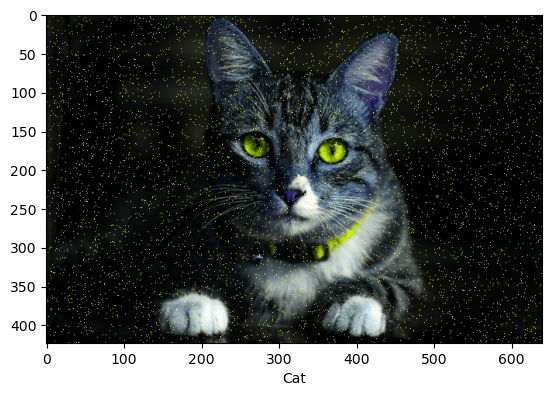

In [12]:
predict("cat.png",32,3)

(32, 32, 3)
1/1 [==============================] - 0s 247ms/step
9


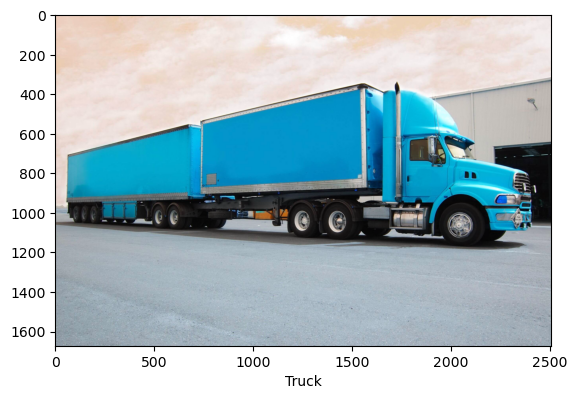

In [13]:
predict("truck.jpg",32,3)

(32, 32, 3)
1/1 [==============================] - 0s 236ms/step
1


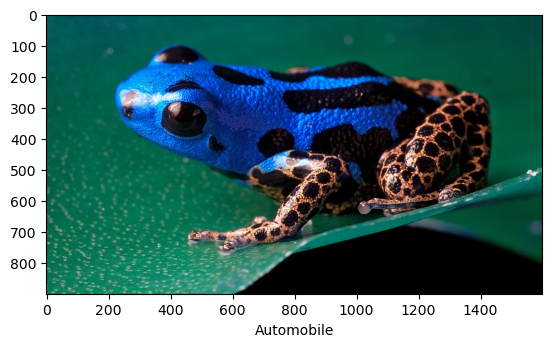

In [14]:
predict("frog.jpg",32,3)

(32, 32, 3)
1/1 [==============================] - 0s 313ms/step
7


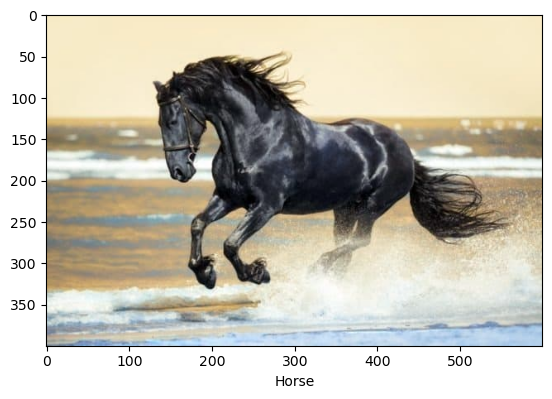

In [16]:
predict("horse.jpg",32,3);